# Bond with Embedded Calls and Put Options

Value a bond with embedded optionality using the Hull-White and Black-Karasinski model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
from financepy.finutils import *
from financepy.products.bonds import *
from financepy.products.bonds.FinBond import FinBond
from financepy.products.bonds.FinBondEmbeddedOption import FinBondEmbeddedOption

from financepy.market.curves.FinDiscountCurve import FinDiscountCurve
from financepy.products.libor.FinLiborSwap import FinLiborSwap
from financepy.products.libor.FinLiborCurve import FinLiborCurve

from financepy.models.FinModelRatesHW import FinModelRatesHW
from financepy.models.FinModelRatesBK import FinModelRatesBK

## Example from Matlab

https://fr.mathworks.com/help/fininst/optembndbyhw.html#bviuizn-1_sep_optembndbyhw_example1

In [4]:
settlementDate = FinDate(1, 1, 2007)

### Set up discount curve

In [6]:
dcType = FinDayCountTypes.ACT_360
fixedFreq = FinFrequencyTypes.SEMI_ANNUAL
swap1 = FinLiborSwap(settlementDate, FinDate(1,1,2008), 0.05, fixedFreq, dcType)
swap2 = FinLiborSwap(settlementDate, FinDate(1,1,2009), 0.05, fixedFreq, dcType)
swap3 = FinLiborSwap(settlementDate, FinDate(1,1,2010), 0.05, fixedFreq, dcType)
swaps = [swap1, swap2, swap3]
discountCurve = FinLiborCurve(settlementDate, [], [], swaps)

In [7]:
print(discountCurve)

OBJECT TYPE: FinLiborCurve
VALUATION DATE: MON 01 JAN 2007
SWAP: 
OBJECT TYPE: FinLiborSwap
START DATE: MON 01 JAN 2007
TERMINATION DATE: TUE 01 JAN 2008
MATURITY DATE: TUE 01 JAN 2008
NOTIONAL: 100.0
PAY FIXED FLAG: True
FIXED COUPON: 0.05
FLOAT SPREAD: 0.0
FIXED FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FLOAT FREQUENCY: FinFrequencyTypes.QUARTERLY
FIXED DAY COUNT: FinDayCountTypes.ACT_360
FLOAT DAY COUNT: FinDayCountTypes.THIRTY_E_360
CALENDAR: FinCalendarTypes.WEEKEND
BUS DAY ADJUST: FinBusDayAdjustTypes.FOLLOWING
DATE GEN TYPE: FinDateGenRuleTypes.BACKWARD
SWAP: 
OBJECT TYPE: FinLiborSwap
START DATE: MON 01 JAN 2007
TERMINATION DATE: THU 01 JAN 2009
MATURITY DATE: THU 01 JAN 2009
NOTIONAL: 100.0
PAY FIXED FLAG: True
FIXED COUPON: 0.05
FLOAT SPREAD: 0.0
FIXED FREQUENCY: FinFrequencyTypes.SEMI_ANNUAL
FLOAT FREQUENCY: FinFrequencyTypes.QUARTERLY
FIXED DAY COUNT: FinDayCountTypes.ACT_360
FLOAT DAY COUNT: FinDayCountTypes.THIRTY_E_360
CALENDAR: FinCalendarTypes.WEEKEND
BUS DAY ADJUST: Fi

### Set up the Puttable Bond

First create a bond that we will use as a reference

In [8]:
maturityDate = FinDate(1, 1, 2010)
coupon = 0.05
frequencyType = FinFrequencyTypes.ANNUAL
accrualType = FinDayCountTypes.ACT_ACT_ICMA

In [9]:
bond = FinBond(maturityDate, coupon, frequencyType, accrualType)

In [10]:
v = bond.valueBondUsingDiscountCurve(settlementDate, discountCurve)

In [11]:
print("Pure Bond Price:", v)

Pure Bond Price: 99.62398708897757


Now specify the put and call dates

In [12]:
callDates = []
callPrices = []
putDates = [FinDate(1, 1, 2008), FinDate(1, 1, 2009), FinDate(1, 1, 2010)]
putPrices = [100.0, 100.0, 100.0]

Now create the FinBondEmbeddedOption

In [13]:
puttableBond = FinBondEmbeddedOption(maturityDate, coupon, frequencyType, accrualType,
                                     callDates, callPrices, putDates, putPrices)

### The Hull-White Model

In [14]:
sigma = 0.01  # basis point volatility
a = 0.1
numTimeSteps = 200

In [15]:
model = FinModelRatesHW(sigma, a, numTimeSteps)

In [16]:
v = puttableBond.value(settlementDate, discountCurve, model)

In [17]:
print(v)

{'bondwithoption': 100.47797346960338, 'bondpure': 99.62398708897757}


### Convergence Testing

In [18]:
timeSteps = range(20,220,1)
values = []
for numTimeSteps in timeSteps:
    model = FinModelRatesHW(sigma, a, numTimeSteps)
    v = puttableBond.value(settlementDate, discountCurve, model)
    values.append(v['bondwithoption'])

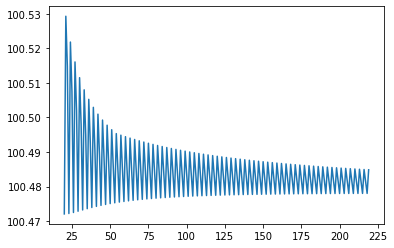

In [19]:
plt.plot(timeSteps, values)

Copyright (c) 2020 Dominic O'Kane